In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls='/content/gdrive/MyDrive/ColabNotebooks/PRANAY/Dataset/Dataset/train/'.

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
train_path='/content/gdrive/MyDrive/ColabNotebooks/PRANAY/Dataset/Dataset/train/'#NamesareAeroplane,Bicycle,Car'
#train_path='images/cell_images/train'#FolderNamesareParasitizedandUninfected
training_names=os.listdir(train_path)

In [ ]:
image_paths=[]
image_classes=[]
class_id=0

In [ ]:
def imglist(path):
  return[os.path.join(path,f)for f in os.listdir(path)]

In [ ]:
for training_name in training_names:
  dir=os.path.join(train_path,training_name)
  class_path=imglist(dir)
  image_paths+=class_path
  image_classes+=[class_id]*len(class_path)
  class_id+=1

In [ ]:
des_list=[]

In [ ]:
brisk=cv2.BRISK_create(30)
for image_path in image_paths:
  im=cv2.imread(image_path)
  kpts,des=brisk.detectAndCompute(im,None)
  des_list.append((image_path,des))

In [ ]:
descriptors=des_list[0][1]
for image_path, descriptor in des_list[1:]:
  descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors_float=descriptors.astype(float)

In [ ]:
from scipy.cluster.vq import kmeans, vq
k=200#kmeanswith100clustersgivesloweraccuracyfortheaeroplaneexamplevoc,
voc, variance=kmeans(descriptors_float,k,1)

In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
  words,distance=vq(des_list[i][1],voc)
  for w in words:
    im_features[i][w] += 1

In [ ]:
  one_vec=im_features[0]
  one_vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(len(im_features))
print(im_features)

20
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from matplotlib import pyplot as plt

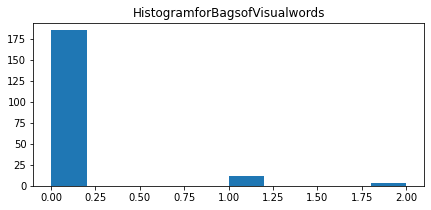

In [ ]:
#Creatinghistogram
fig,ax=plt.subplots(figsize=(7,3))
ax.hist(one_vec)
plt.title("HistogramforBagsofVisualwords")
#Showplot
plt.show()